# Predicting Rate my Professor Ratings

### Identifying the predictive Task 

**What is our predictive task?**

In this project we will analyze a dataset of user's rate my professor ratings and predict what rating a user will give to a certain professor. Our data set contains 5 features: professor name, review text, rating, difficulty and time/date the review was written.

**How will we evaluate our model?**

To evaluate this model, we will use MSE, MAE, and RMSE for each of our models based on the our predicted labels and the validation set. 

**What are our baselines?**

Relevant baselines to compare to our prediction models to would be a naive model which only predicts the global mean for each professor. We will calculate the global mean of the entire data set (ie.. every rating of every professor) for the baseline prediction.

**How do we know our model is valid?**

To ensure the validity of our model, we will compare the RMSE, MSE, and MAE of our model in comparison to the naive mean prediction to ensure that our model performs better than the baseline. Additionally, we will train the model on a subset of the data set and allocate another portion as our test set to guarantee that our model works for data it has not yet been trained on which is a direct indicator of it's real world performance. 

In [1]:
# !pip install datasets

In [2]:
from datasets import load_dataset

ds = load_dataset("ZephyrUtopia/ratemyprofessors_reviews")

/home/jgamba/miniconda3/envs/Data_Sci/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating test split: 100%|██████████| 144103/144103 [00:00<00:00, 3736426.29 examples/s]


In [3]:
import pandas as pd

df_train = ds["train"].to_pandas()
df_test = ds["test"].to_pandas()

### Exploratory Analysis, Data Collection, Preprocessing, and Discussion

**Dataset**
Our data comes from HuggingFace and was collected through webscraping a total of 480,342 RateMyProfessors reviews. The dataset is split into a training set with 336,239 reviews and a test set with 144,103 reviews. Each data vector contains 5 features:
- Name of instructor
- Review text
- Course rating
- Course difficulty
- Date submitted

In [4]:
df_train['rating'].value_counts()

rating
5.0    179439
1.0     59866
4.0     45200
2.0     26333
3.0     25314
4.5        39
3.5        20
1.5        14
2.5        14
Name: count, dtype: int64

(336239, 5)
(144103, 5)
480342


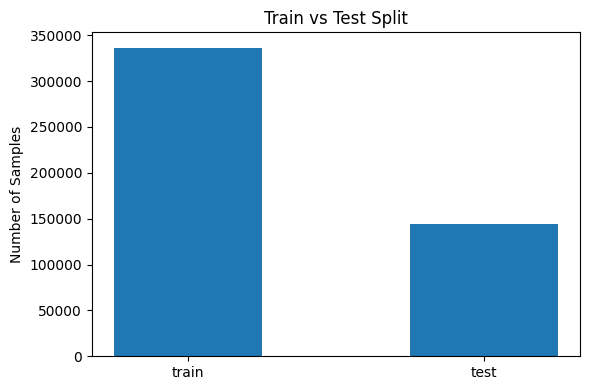

In [ ]:
# Graph 1
import matplotlib.pyplot as plt
import numpy as np

print(df_train.shape)
print(df_test.shape)
print (df_test.shape[0] + df_train.shape[0])

plt.figure(figsize=(6,4))
plt.bar(["train", "test"], [len(df_train), len(df_test)], width=0.5)
plt.title("Train vs Test Split")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

['1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']


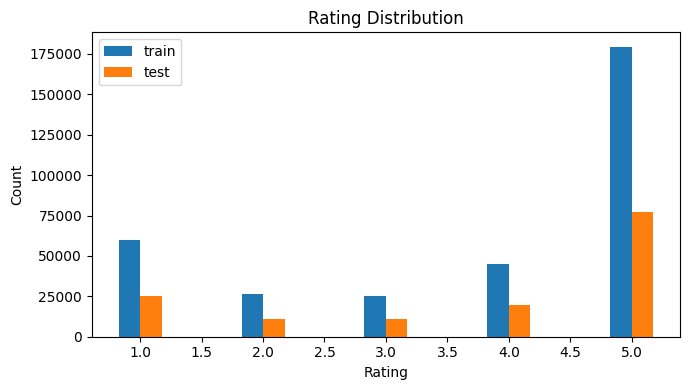

In [ ]:
#Graph 2
# get unique rating values
train_ratings = df_train['rating']
test_ratings = df_test['rating']
all_ratings = sorted(set(train_ratings).union(test_ratings))
print(all_ratings)

train_counts = df_train["rating"].value_counts().reindex(all_ratings)
test_counts  = df_test["rating"].value_counts().reindex(all_ratings)

x = np.arange(len(all_ratings))
width = 0.35

plt.figure(figsize=(7,4))
# print(train_counts.values)
plt.bar(x - width/2, train_counts.values, width, label="train")
plt.bar(x + width/2, test_counts.values, width, label="test")

plt.xticks(x, all_ratings)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")
plt.legend()
plt.tight_layout()
plt.show()


Looking at correlation between certain features

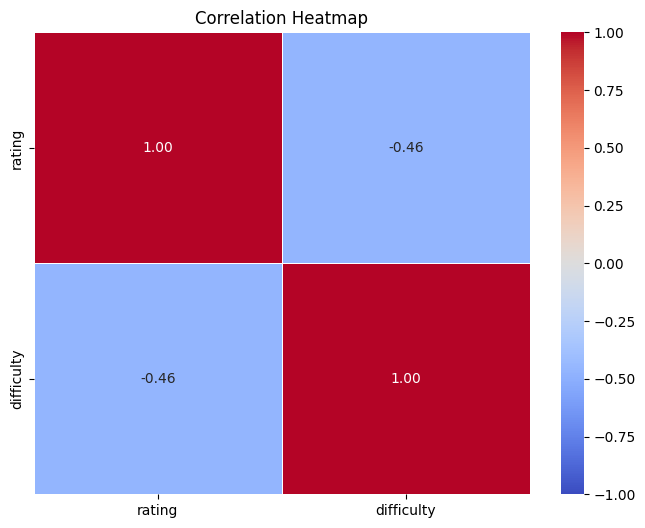

In [170]:
#Graph 3

import seaborn as sns

df_train.columns

features = df_train[['rating', 'difficulty']].apply(pd.to_numeric, errors='coerce').round().astype(int)
matrix = features.corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipykernel_8256/3549927426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=features, x='difficulty', y='rating', palette='tab10')


Text(0, 0.5, 'Rating')

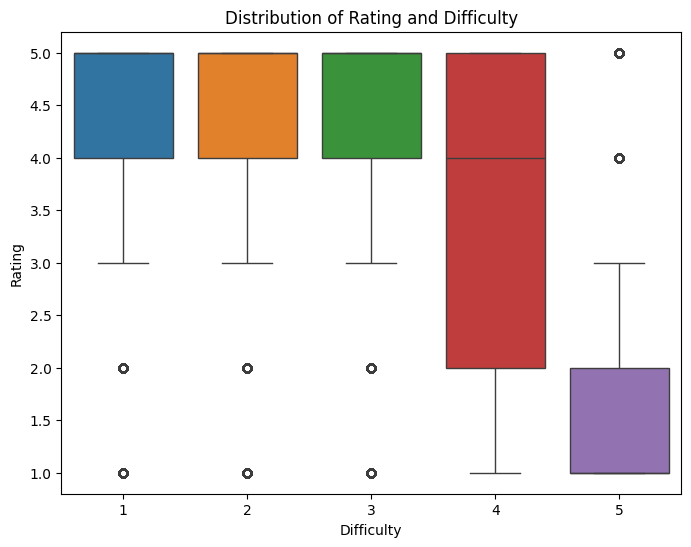

In [ ]:
#Graph 4
plt.figure(figsize=(8,6))

sns.boxplot(data=features, x='difficulty', y='rating', palette='tab10')
plt.title('Distribution of Rating and Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Rating')

In [ ]:
#Graph 5

# Positive ratings and common words
import string
from collections import defaultdict
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

positive_df = df_train[df_train['rating'].astype(float) > 3]
punctuation = set(string.punctuation)
stop_words = set(stopwords.words('english'))


count = defaultdict(int)
for idx, row in positive_df.iterrows():
    text = row['text']
    text = text.lower()
    text = [c for c in text if not (c in punctuation)]
    text = ''.join(text)
    words = text.strip().split()
    for w in words:
        if w not in stop_words:
            count[w] += 1
    
counts = [(count[w], w) for w in count]
counts.sort(reverse=True)

[nltk_data] Downloading package stopwords to /home/jgamba/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Text(0.5, 1.0, 'Top 30 Words in Positive Reviews')

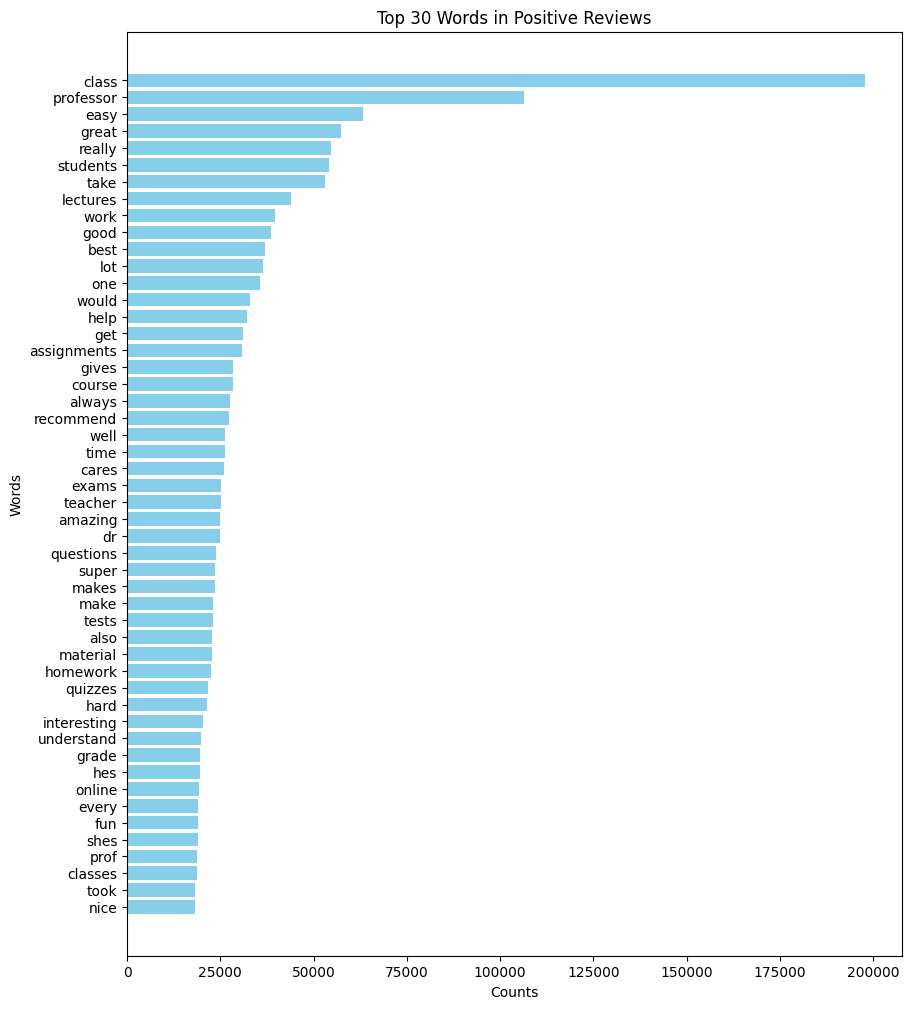

In [16]:
small_data_pos = counts[:50]
small_data_pos.reverse()
word_count_pos, words_pos = zip(*small_data_pos)

plt.figure(figsize=(10, 12)) 
plt.barh(words_pos, word_count_pos, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Words')
plt.yticks(fontsize=10)
plt.title('Top 30 Words in Positive Reviews')

In [17]:
negative_df = df_train[df_train['rating'].astype(float) < 3]
punctuation = set(string.punctuation)
stop_words = set(stopwords.words('english'))


count2 = defaultdict(int)
for idx, row in negative_df.iterrows():
    text = row['text']
    text = text.lower()
    text = [c for c in text if not (c in punctuation)]
    text = ''.join(text)
    words = text.strip().split()
    for w in words:
        if w not in stop_words:
            count2[w] += 1
    
counts2 = [(count2[w], w) for w in count2]
counts2.sort(reverse=True)

Text(0.5, 1.0, 'Top 30 Words in Negative Reviews')

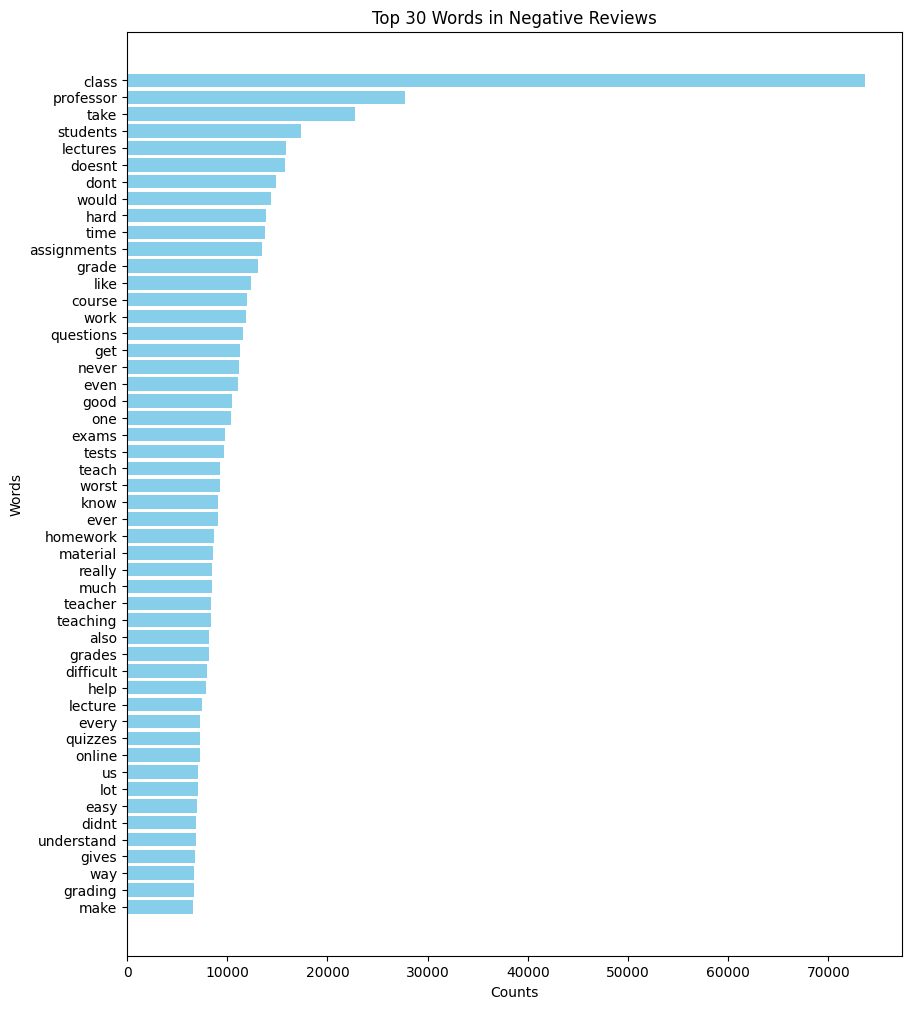

In [ ]:
#Graph 6

small_data_neg = counts2[:50]
small_data_neg.reverse()
word_count_neg, words_neg = zip(*small_data_neg)

plt.figure(figsize=(10, 12)) 

plt.barh(words_neg, word_count_neg, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Words')
plt.yticks(fontsize=10)
plt.title('Top 30 Words in Negative Reviews')

In [19]:
# Separate the words which are purely positive and purely negative
pos_words = set([i[1] for i in small_data_pos])
print(pos_words)

neg_words = set([i[1] for i in small_data_neg])
print(neg_words)

all_words = pos_words.union(neg_words) 
common = [w for w in all_words if w in pos_words and w in neg_words]
# print(common)
only_pos = [p for p in pos_words if p not in common]
only_neg = [n for n in neg_words if n not in common]

only_pos_counts = [w[0] for w in small_data_pos if w[1] in only_pos]
only_neg_counts = [w[0] for w in small_data_neg if w[1] in only_neg]

print(len(only_pos))
print(len(only_neg))

{'amazing', 'assignments', 'get', 'class', 'nice', 'great', 'best', 'took', 'quizzes', 'tests', 'grade', 'dr', 'teacher', 'also', 'classes', 'students', 'would', 'gives', 'take', 'material', 'understand', 'cares', 'fun', 'online', 'shes', 'super', 'questions', 'makes', 'good', 'help', 'lot', 'course', 'homework', 'recommend', 'work', 'one', 'really', 'exams', 'hard', 'always', 'professor', 'hes', 'lectures', 'make', 'easy', 'well', 'time', 'every', 'interesting', 'prof'}
{'assignments', 'get', 'class', 'quizzes', 'tests', 'doesnt', 'worst', 'grades', 'teacher', 'grade', 'also', 'students', 'would', 'gives', 'dont', 'way', 'take', 'didnt', 'material', 'understand', 'online', 'even', 'questions', 'good', 'help', 'lot', 'ever', 'course', 'teaching', 'homework', 'us', 'never', 'grading', 'know', 'teach', 'work', 'one', 'really', 'exams', 'hard', 'professor', 'lectures', 'make', 'easy', 'like', 'difficult', 'much', 'time', 'every', 'lecture'}
18
18


Text(0.5, 1.0, 'Top 30 Words in Positive Reviews')

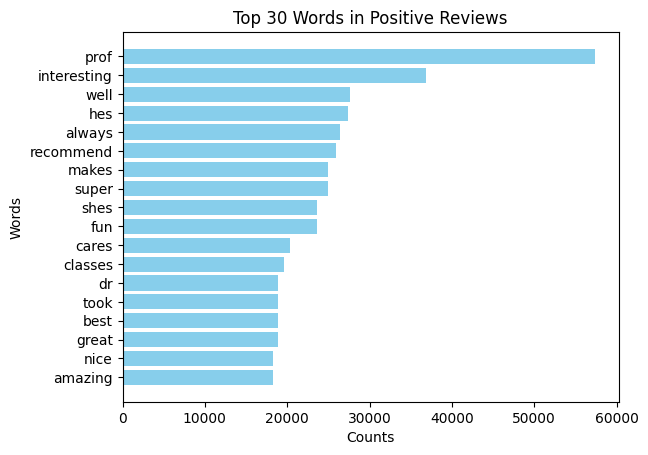

In [ ]:
#Graph 7

plt.barh(only_pos, only_pos_counts, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Top 30 Words in Positive Reviews')

Text(0.5, 1.0, 'Top 30 Words in Negative Reviews')

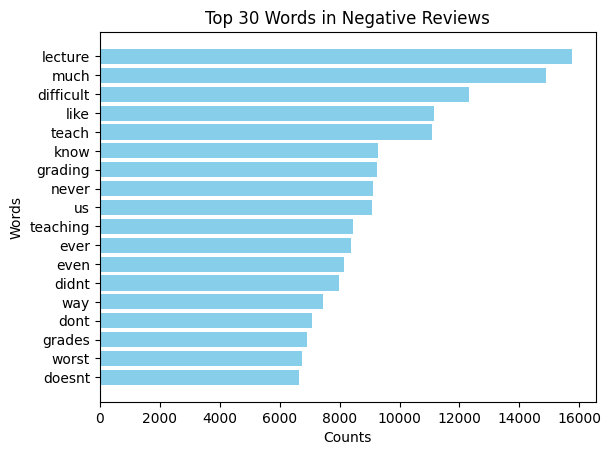

In [ ]:
#Graph 8

plt.barh(only_neg, only_neg_counts, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Top 30 Words in Negative Reviews')

### Modeling

In [22]:
import numpy as np
def MSE(y, ypred):
    y = np.array(y, dtype=float)
    ypred = np.array(ypred, dtype=float)
    return np.mean((y - ypred) ** 2)

def getGlobalAverage(trainRatings):
    return np.mean(trainRatings)



In [23]:
# find average rating of training dataset
train_ratings = np.array(df_train['rating'], dtype='float')
test_ratings = np.array(df_test['rating'], dtype='float')
print(getGlobalAverage(train_ratings))

3.7674704600001783


In [24]:
# baseline model, just predict global average
print(MSE(train_ratings, getGlobalAverage(train_ratings)))

2.4709575975729883


In [65]:
# create time-based features for the data

from sklearn.preprocessing import OneHotEncoder

df_train["timestamp"] = pd.to_datetime(df_train["date"])
df_train["year"] = df_train["timestamp"].dt.year
df_train["month"] = df_train["timestamp"].dt.month
df_train["dayofweek"] = df_train["timestamp"].dt.dayofweek
df_train["day"] = df_train["timestamp"].dt.day


In [66]:
# create TF-IDF Vectorizer feature
from sklearn.feature_extraction.text import TfidfVectorizer

text_vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    stop_words="english"
)

In [67]:
# combine features using ColumnTransformer

from sklearn.compose import ColumnTransformer

X = df_train[["name", "difficulty", "year", "month", "day", "dayofweek", "text"]]
y = df_train["rating"]

preprocess = ColumnTransformer(
    transformers=[
        ("name", OneHotEncoder(handle_unknown="ignore"), ["name"]),
        ("num", "passthrough", ["difficulty", "year", "month", "day", "dayofweek"]),
        ("text", TfidfVectorizer(max_features=5000, stop_words="english"), "text"),
    ]
)

In [68]:
# use pipeline to process features and put through ridge regression model

from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", Ridge(alpha=1.0))
])

In [69]:
# fit model to subset of training set

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('name', ...), ('num', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [70]:
# clip ratings so they fall in the range, then predict on validation subset of the training set and find mse

from sklearn.metrics import mean_squared_error

preds = model.predict(X_valid)
preds = np.clip(preds, a_min=1, a_max=5)
mse = mean_squared_error(y_valid, preds)
print("MSE:", mse)

MSE: 0.7359913378662452


In [71]:
# create date features for the test dataset

df_test["timestamp"] = pd.to_datetime(df_test["date"])
df_test["year"] = df_test["timestamp"].dt.year
df_test["month"] = df_test["timestamp"].dt.month
df_test["dayofweek"] = df_test["timestamp"].dt.dayofweek
df_test["day"] = df_test["timestamp"].dt.day

In [72]:
# predict on ratings from the test dataset to find MSE

X_test = df_test[["name", "difficulty", "year", "month", "day", "dayofweek", "text"]]
y_test = df_test["rating"]

preds = model.predict(X_test)
preds = np.clip(preds, a_min=1, a_max=5)
mse = mean_squared_error(y_test, preds)
print("MSE:", mse)

MSE: 0.7342209620200201


#### Improvements:

In [35]:
# try changing TF-IDF Params (increase features)

preprocess = ColumnTransformer(
    transformers=[
        ("name", OneHotEncoder(handle_unknown="ignore"), ["name"]),
        ("num", "passthrough", ["difficulty", "year", "month", "day", "dayofweek"]),
        ("text", TfidfVectorizer(max_features=6000, stop_words="english"), "text"),
    ]
)

In [36]:
model2 = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", Ridge(alpha=1.0))
])

In [37]:
model2.fit(X_train, y_train)

preds2 = model2.predict(X_test)
preds2 = np.clip(preds2, a_min=1, a_max=5)
mse2 = mean_squared_error(y_test, preds2)
print("MSE:", mse2)

MSE: 0.731822071275261


In [23]:
preds2 = model2.predict(X_valid)
preds2 = np.clip(preds2, a_min=1, a_max=5)
mse2 = mean_squared_error(y_valid, preds2)
print("MSE:", mse2)

MSE: 0.7349860765460072


In [24]:
# try changing TF-IDF Params (increase features)
for feature in [10000, 12000, 13000, 14000, 15000, 16000]:

    preprocess = ColumnTransformer(
        transformers=[
            ("name", OneHotEncoder(handle_unknown="ignore"), ["name"]),
            ("num", "passthrough", ["difficulty", "year", "month", "day", "dayofweek"]),
            ("text", TfidfVectorizer(max_features=feature, stop_words="english"), "text"),
        ]
    )

    model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", Ridge(alpha=1.0))
])
    model.fit(X_train, y_train)

    preds = model.predict(X_valid)
    preds = np.clip(preds, a_min=1, a_max=5)
    mse = mean_squared_error(y_valid, preds)
    print("Valid MSE:", mse)

Valid MSE: 0.7334343619182396
Valid MSE: 0.7327953906042577
Valid MSE: 0.7325050544992078
Valid MSE: 0.732426689273289
Valid MSE: 0.7325804901462327
Valid MSE: 0.7323205681353712


In [42]:
preprocess = ColumnTransformer(
        transformers=[
            ("name", OneHotEncoder(handle_unknown="ignore"), ["name"]),
            ("num", "passthrough", ["difficulty", "year", "month", "day", "dayofweek"]),
            ("text", TfidfVectorizer(max_features=16000, stop_words="english"), "text"),
        ]
    )

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", Ridge(alpha=1.0))
])

model.fit(X_train, y_train)

preds = model.predict(X_test)
preds = np.clip(preds, a_min=1, a_max=5)
mse3 = mean_squared_error(y_test, preds)
print("Test MSE:", mse)

Test MSE: 0.7323205681353712


In [ ]:
# No more improvement increasing features

# try increasing n-grams

In [43]:
best_valid_mse = 0.7323205681353712 #16000 features
best_range = 0
for num in [2, 3, 4, 5]:
    preprocess = ColumnTransformer(
        transformers=[
            ("name", OneHotEncoder(handle_unknown="ignore"), ["name"]),
            ("num", "passthrough", ["difficulty", "year", "month", "day", "dayofweek"]),
            ("text", TfidfVectorizer(max_features=13000, ngram_range=(1,num), stop_words="english"), "text"),
        ]
    )

    model3 = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", Ridge(alpha=1.0))
    ])

    model3.fit(X_train, y_train)

    preds = model3.predict(X_valid)
    preds = np.clip(preds, a_min=1, a_max=5)
    valid_mse = mean_squared_error(y_valid, preds)
    print(f'{num}-range has valid-mse: {valid_mse}')
    
    if valid_mse < best_valid_mse:
        best_range = num
        best_valid_mse = valid_mse

print(f'Best valid-mse with {best_range}-gram is {best_valid_mse}')




2-range has valid-mse: 0.6728172442784467
3-range has valid-mse: 0.6715106837708766
4-range has valid-mse: 0.6716274422638255
5-range has valid-mse: 0.6714462931903205
Best valid-mse with 5-gram is 0.6714462931903205


In [ ]:
preprocess = ColumnTransformer(
        transformers=[
            ("name", OneHotEncoder(handle_unknown="ignore"), ["name"]),
            ("num", "passthrough", ["difficulty", "year", "month", "day", "dayofweek"]),
            ("text", TfidfVectorizer(max_features=16000, stop_words="english"), "text"),
        ]
    )

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", Ridge(alpha=1.0))
])

model.fit(X_train, y_train)

preds = model.predict(X_test)
preds = np.clip(preds, a_min=1, a_max=5)
mse3 = mean_squared_error(y_test, preds)
print("Test MSE:", mse)

In [45]:
# try a different regression model
from sklearn.linear_model import Lasso

preprocess = ColumnTransformer(
        transformers=[
            ("name", OneHotEncoder(handle_unknown="ignore"), ["name"]),
            ("num", "passthrough", ["difficulty", "year", "month", "day", "dayofweek"]),
            ("text", TfidfVectorizer(max_features=16000, ngram_range=(1,5), stop_words="english"), "text"),
        ]
    )

model4 = Pipeline(steps=[
    ('preprocess', preprocess),
    ('regressor', Lasso(alpha=1.0))
])

model4.fit(X_train, y_train)

preds = model4.predict(X_valid)
preds = np.clip(preds, a_min=1, a_max=5)
mse = mean_squared_error(y_valid, preds)
print("Valid MSE:", mse)

preds = model4.predict(X_test)
preds = np.clip(preds, a_min=1, a_max=5)
mse = mean_squared_error(y_test, preds)
print("Test MSE:", mse)




Valid MSE: 2.462824647497568
Test MSE: 2.45892669055887


In [47]:
# Tune alpha values
scores = defaultdict(float)

best_alpha = 1
for alpha in range(2,40):
    preprocess = ColumnTransformer(
            transformers=[
                ("name", OneHotEncoder(handle_unknown="ignore"), ["name"]),
                ("num", "passthrough", ["difficulty", "year", "month", "day", "dayofweek"]),
                ("text", TfidfVectorizer(max_features=16000, ngram_range=(1,5), stop_words="english"), "text"),
            ]
        )
    
    model5 = Pipeline(steps=[
        ("preprocess", preprocess),
        ("regressor", Ridge(alpha=alpha))
        ])

    model5.fit(X_train, y_train)

    preds = model5.predict(X_valid)
    preds = np.clip(preds, a_min=1, a_max=5)
    valid_mse = mean_squared_error(y_valid, preds)
    
    scores[alpha] = valid_mse
    
    if valid_mse < best_valid_mse:
        best_valid_mse = valid_mse
        best_alpha = alpha

print(f'Best alpha is {best_alpha} with a valid mse of {best_valid_mse}')

Best alpha is 4 with a valid mse of 0.6435968596236634


In [48]:
model5 = Pipeline(steps=[
        ("preprocess", preprocess),
        ("regressor", Ridge(alpha=4))
        ])

model5.fit(X_train, y_train)

preds = model5.predict(X_test)
preds = np.clip(preds, a_min=1, a_max=5)
test_mse = mean_squared_error(y_test, preds)

In [49]:
print(f'Best test_mse of final model: {test_mse}')

Best test_mse of final model: 0.6436915440604454


### Evaluation

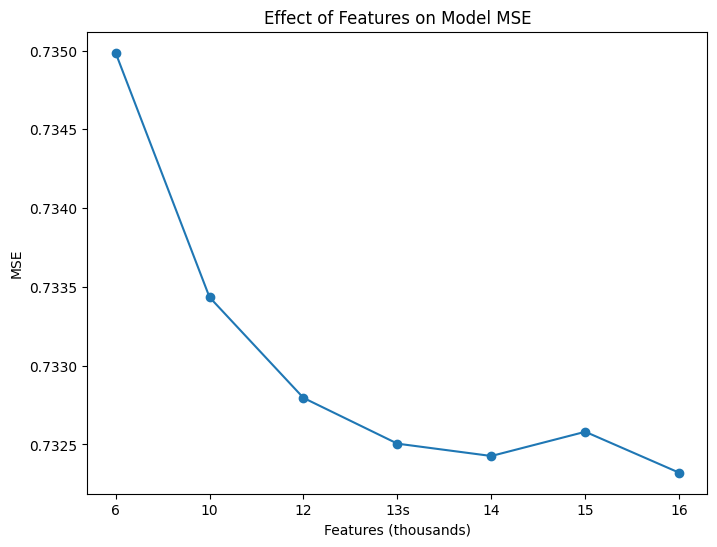

In [63]:
# Plot the changes of MSE after every improvement

# Features
x = np.array(['6', '10', '12', '13s', '14', '15', '16'])
y = np.array([0.7349860765460072, 0.7334343619182396, 0.7327953906042577, 0.7325050544992078, 0.732426689273289, 0.7325804901462327, 0.7323205681353712])

plt.figure(figsize=(8,6))
plt.plot(x, y, marker='o')
plt.xlabel('Features (thousands)')
plt.ylabel('MSE')
plt.title('Effect of Features on Model MSE')

plt.show()

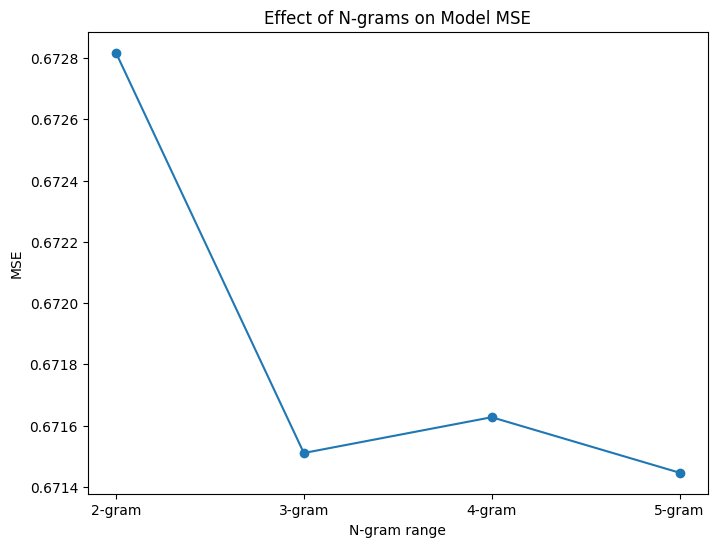

In [62]:
# N-gram Range

x = np.array(['2-gram', '3-gram', '4-gram', '5-gram'])
y= np.array([0.6728172442784467, 0.6715106837708766, 0.6716274422638255,
             0.6714462931903205])

plt.figure(figsize=(8,6))
plt.plot(x, y, marker='o')
plt.xlabel('N-gram range')
plt.ylabel('MSE')
plt.title('Effect of N-grams on Model MSE')

plt.show()

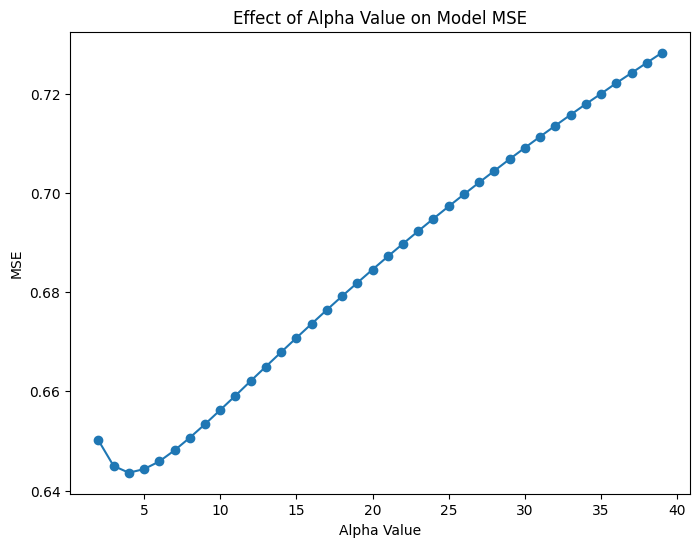

In [61]:
# tune alpha values

x = np.array(sorted(scores.keys()))
y = np.array([scores[k] for k in x])

plt.figure(figsize=(8,6))
plt.plot(x, y, marker='o')
plt.xlabel('Alpha Value')
plt.ylabel('MSE')
plt.title('Effect of Alpha Value on Model MSE')

plt.show()

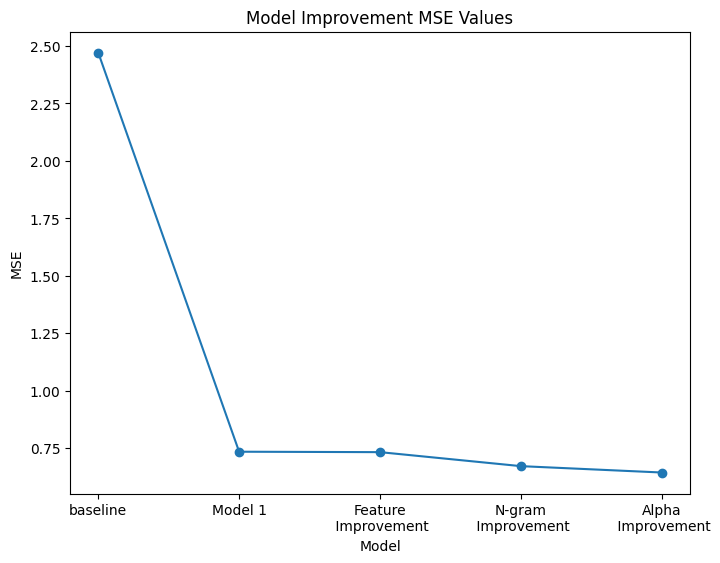

In [74]:
# Comparison to Baseline

x = np.array(['baseline', 'Model 1', 'Feature\n Improvement', 'N-gram\n Improvement', 'Alpha\n Improvement'])
y = np.array([2.4709575975729883, 0.7342209620200201, 0.7323205681353712, 0.6714462931903205, 0.6436915440604454])

plt.figure(figsize=(8,6))
plt.plot(x, y, marker='o')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Model Improvement MSE Values')

plt.show()

Text(0.5, 1.0, 'Model Improvement RMSE Values')

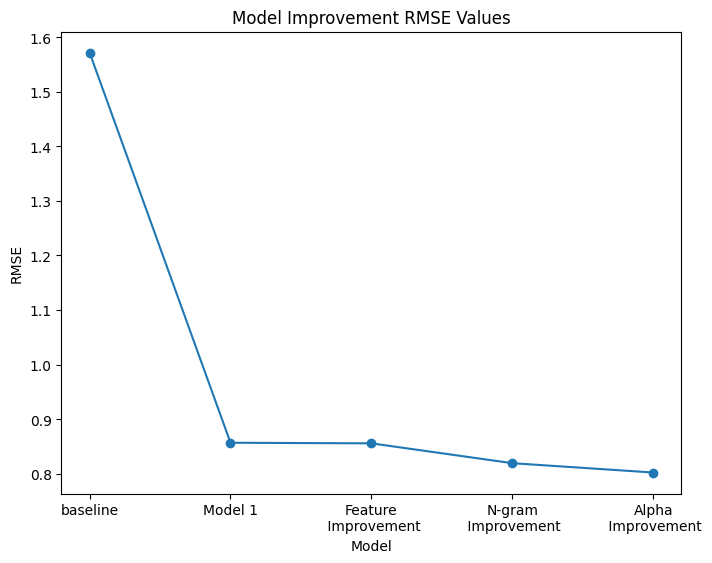

In [76]:
import math

x = np.array(['baseline', 'Model 1', 'Feature\n Improvement', 'N-gram\n Improvement', 'Alpha\n Improvement'])
y = np.array([math.sqrt(2.4709575975729883), math.sqrt(0.7342209620200201), math.sqrt(0.7323205681353712), math.sqrt(0.6714462931903205), math.sqrt(0.6436915440604454)])

plt.figure(figsize=(8,6))
plt.plot(x, y, marker='o')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Improvement RMSE Values')